### Sang_Copy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Breast_cancer_data.csv')

In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


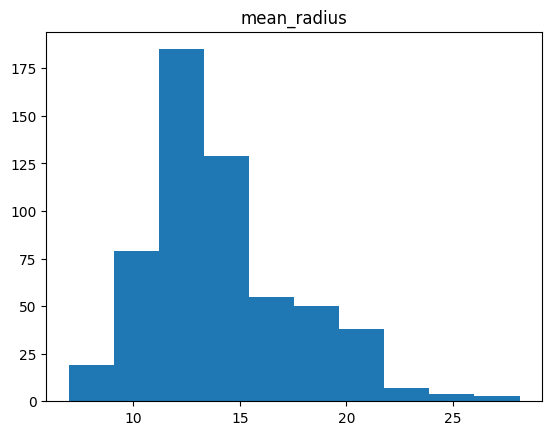

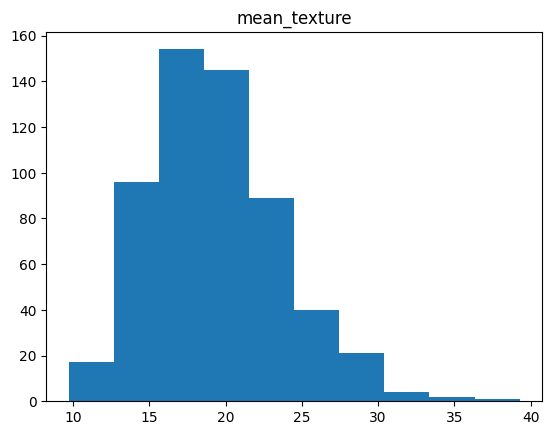

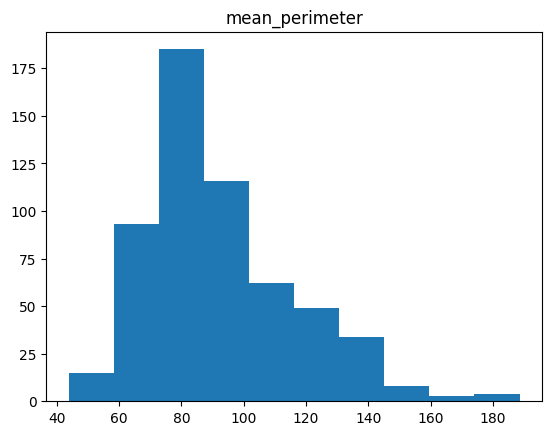

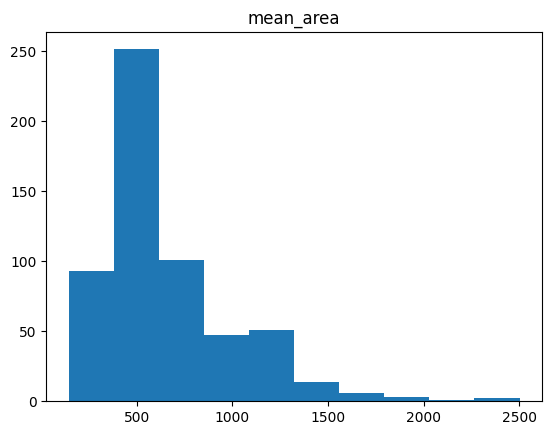

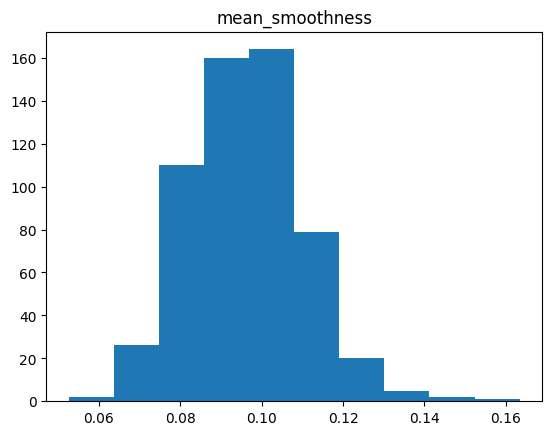

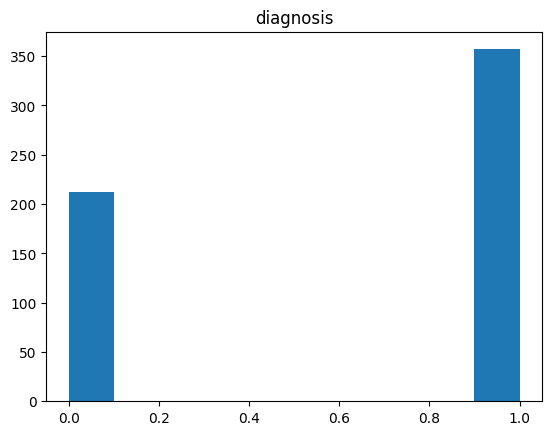

In [7]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


<Axes: >

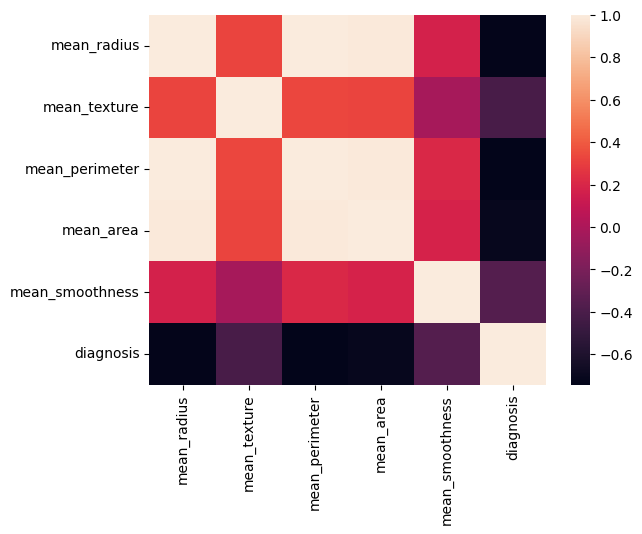

In [8]:
print(df.corr())
sns.heatmap(df.corr())

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [10]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [11]:
def model_score(model, x_tr, y_tr, x_ts, y_ts):
    model.fit(x_tr, y_tr)
    result = model.predict(x_ts)
    print(accuracy_score(y_ts, result))

In [12]:
x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0,test_size=0.2)

In [13]:
model_score(KNeighborsClassifier(), x_train,y_train,x_val, y_val)
model_score(DecisionTreeClassifier(), x_train,y_train,x_val, y_val)
model_score(RandomForestClassifier(), x_train,y_train,x_val, y_val)
model_score(SVC(), x_train,y_train,x_val, y_val)
# model_score(KNeighborsClassifier(), x_train,y_train,x_val, y_val)

0.9122807017543859
0.8771929824561403
0.9122807017543859
0.8771929824561403


In [ ]:
final_model = RandomForestClassifier()
final_model.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean()}")

Cross-validation accuracy: 0.9164835164835166


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Hyper
# parameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)


model_score(grid_search, x_train,y_train,x_val, y_val)

0.9210526315789473


In [21]:
final_model = grid_search
final_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

### Model to Pickle

In [22]:
import pickle

# Assuming your trained model is stored in a variable called 'model'
filename = 'breast_cancer_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f"Model saved to {filename}")

Model saved to breast_cancer_model.pkl
